In [2]:
from PIL import Image
import pytesseract

In [12]:
im = Image.open('yanzenma.jpg')

In [3]:
im.size

(160, 70)

In [13]:
# 最基本的用法
t = pytesseract.image_to_string(im)

In [7]:
im.show()

In [16]:
t

u'38-3'

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
import requests

In [11]:
r=requests.get('http://113.108.219.40/Dop/CheckCode.aspx?codemark=38.63767845258748')

In [12]:
with open('code.gif','wb') as f:
    f.write(r.content)

In [28]:
import os
print(os.getcwd())
# im=Image.open('code.png')
img = cv2.imread('foo0.png')
print(img.shape)
# print(type(img))
# print(img.size)
# converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

E:\git\base_function\image_detect
(22, 73, 3)


In [16]:
im.size

NameError: name 'im' is not defined

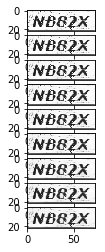

In [55]:
for i in range(9):
    dst = cv2.fastNlMeansDenoisingColored(img,None,30,30,1+1,10+3)
    plt.subplot(9,1,i+1)
#     plt.imshow(img)
#     plt.subplot(122)
    plt.imshow(dst)
plt.show()

In [56]:
dst = cv2.fastNlMeansDenoisingColored(img,None,30,30,1+1,10+3)
cv2.imwrite('cv_code.png',dst)

True

In [60]:
im = Image.open('cv_code.png')
im=im.convert('L')
im.show()
print(pytesseract.image_to_string(im))

'Naszx


In [78]:
def get_bin_table(threshold=170):
    table = []
    for i in range(256):
        if i < threshold:
            table.append(0)
        else:
            table.append(1)
    return table

In [102]:
table=get_bin_table()
out = im.point(table,'1')

In [103]:
out.size

(73, 22)

In [104]:
out=out.crop((1,1,out.size[0]-1,out.size[1]-1))

In [105]:
out

In [106]:
pytesseract.image_to_string(out)

'’NBBZX'

In [63]:
print(type(out))

<class 'PIL.Image.Image'>


In [107]:
import numpy as np

In [73]:
np.asarray(out)

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       ...,
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

In [74]:
out

In [27]:
# gif to png
import sys

def processImage(infile):
    try:
        im = Image.open(infile)
    except IOError:
        print("Cant load", infile)
        sys.exit(1)
    i = 0
    mypalette = im.getpalette()

    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            new_im.save('foo'+str(i)+'.png')

            i += 1
            im.seek(im.tell() + 1)

    except EOFError:
        pass # end of sequence

processImage('no-greed-code.gif')

In [109]:
def sum_9_region(img, x, y):
    """
    9邻域框,以当前点为中心的田字框,黑点个数
    :param x:
    :param y:
    :return:
    """
    # todo 判断图片的长宽度下限
    cur_pixel = img.getpixel((x, y))  # 当前像素点的值
    width = img.width
    height = img.height

    if cur_pixel == 1:  # 如果当前点为白色区域,则不统计邻域值
        return 255

    if y == 0:  # 第一行
        if x == 0:  # 左上顶点,4邻域
            # 中心点旁边3个点
            sum = cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))
            return 4 - sum
        elif x == width - 1:  # 右上顶点
            sum = cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1))

            return 4 - sum
        else:  # 最上非顶点,6邻域
            sum = img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))
            return 6 - sum
    elif y == height - 1:  # 最下面一行
        if x == 0:  # 左下顶点
            # 中心点旁边3个点
            sum = cur_pixel \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y - 1)) \
                  + img.getpixel((x, y - 1))
            return 4 - sum
        elif x == width - 1:  # 右下顶点
            sum = cur_pixel \
                  + img.getpixel((x, y - 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y - 1))

            return 4 - sum
        else:  # 最下非顶点,6邻域
            sum = cur_pixel \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x, y - 1)) \
                  + img.getpixel((x - 1, y - 1)) \
                  + img.getpixel((x + 1, y - 1))
            return 6 - sum
    else:  # y不在边界
        if x == 0:  # 左边非顶点
            sum = img.getpixel((x, y - 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y - 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))

            return 6 - sum
        elif x == width - 1:  # 右边非顶点
            # print('%s,%s' % (x, y))
            sum = img.getpixel((x, y - 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x - 1, y - 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1))

            return 6 - sum
        else:  # 具备9领域条件的
            sum = img.getpixel((x - 1, y - 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1)) \
                  + img.getpixel((x, y - 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y - 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))
            return 9 - sum

In [110]:
for i in range(out.size[0]):
    for j in range(out.size[1]):
        v = sum_9_region(out,i,j)
        out.putpixel((i,j),v)
out